**Attribution:**  

* This notebook was modified from Debsankha Manik's notebook Pandas, GGNB Data Science course held at the University of Goettingen (2019).
* Based "[Seaborn tutorial: Plotting Functions](https://seaborn.pydata.org/tutorial.html) by **Michael Waskom** under [BSD 3-clause](https://opensource.org/licenses/BSD-3-Clause) license.


**NOTE:** Some changes have been made.


<a name="top"></a>Exploratory Data Analysis
===

<a name="top"></a>Outline
---


[Sofisticated plotting with Seaborn](#seaborn)
  * [Jointplot](#jointplot)
  * [Categorical variables](#categorical)
  * [Categorical scatterplots](#categorical_scatterplot)
  * [Distributions of observations within categories](#distribution)
  * [Statistical estimation within categories](#estimation)

<a name="seaborn"></a>Sofisticated plotting with Seaborn
===

Seaborn is a visualization library based on Matplotlib. Its main features are
* high level interface for drawing statistical graphics
* extensive collection of plotting functions  
* works seamlessly with pandas dataframes

By simply importing Seaborn, Matplotlib automatically changes its default settings (fontsize, background canvas color, not frames) to look very clean. 

Accessing Matplotlib via the Seaborn API is a good choice for sofisticated graphics like violon plots or joint plots.
If you are looking for tight control over every detail in a plot, you should use the Matplotlib API.

In [1]:
import seaborn as sns

In [8]:
sns.set(font_scale=1.5) 
sns.set_style("ticks")

In [2]:
import matplotlib.pyplot as plt

<a name="jointplot"></a>Jointplot
---

* The **jointplot()** function offers functionality to plot a scatterplot (bivariate graph) as well as histograms (univariate graph) over both axis.  
* To use seaborn together with a pandas dataframe, we provide the function with the dataframe (in this case ```tips```) along with the labels of the columns we want to use (in this case ```total_bill``` and ```tip```)
* We could also use NumPy arrays for the x and y arguments

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

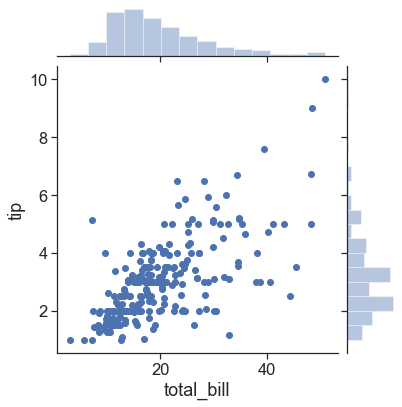

In [9]:
j = sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")

[top](#top)

<a name="categorical"></a>Categorical variables
---

In the tips example we learned how to use plots to visualize the relationship between two continuous numerical variables. But in this dataset there are also categorical variables:
* total bill and tip are _numerical variables_
* weekday and time of day are _categorical variables_  

However, what if one of the main variables we are interested in is categorical? Seaborn offers several options for plots of categorical variables
1. plots that show each observation at each level of categorical variable (**swarmplot**)
2. plots that show an abstract representation of each distribution of observations (**violinplot** and **boxplot**)
3. plots that apply a statistical estimation to show a measure of a central tendency & confidence interval (**barplot**)


[top](#top)

<a name="categorical scatterplot"></a>Categorical scatterplot
---

A simple way to show the the values of some quantitative variable across the levels of a categorical variable is to generalize a scatterplot to the case where one of the variables is categorical. This usually results in massive overlapping of the datapoints. Seaborn's **swarmplot** uses an algorithm to minimize the overlap between points.  
In the example below we see
* the _numerical_ variable ```total_bill``` 
* scattered over the _categorical_ variables of four weekdays
* and colored according to the sex of the waiter/waitress

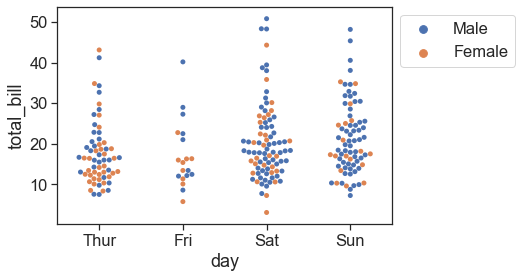

In [10]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

plt.legend(bbox_to_anchor=(1, 1))

[top](#top)

<a name="distribution"></a>Distributions of observations within categories
---

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

##### Boxplot / Whisker plot

Boxplots or box-whisker-plots display groups of numerical data through their quartiles (four groups comprising of a quarter of the data each):
* the bottom and top of the box show the first and third quartiles
* the band inside the box shows the second quartile (median)
* the whiskers exten to the lowest and highest value still within 1.5 IQR (https://en.wikipedia.org/wiki/Interquartile_range)
* observations that fall outside this range are displayed as independent points (outliers)

![boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

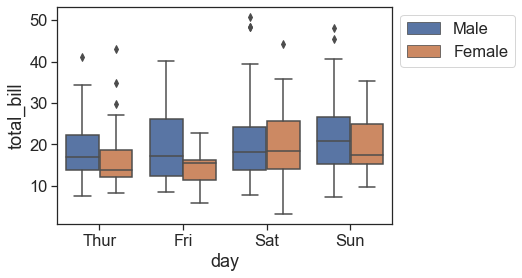

In [11]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.legend(bbox_to_anchor=(1.0, 1))

##### Violinplot

A different approach to showing numerical data belonging to several categories while keeping an estimate of its distribution is the violinplot. It combines the idea of the boxplot with the _kernel density estimation_ (KDE).  
KDE computes a 'smooth' probability density without the use of a prescribed distribution function and fit parameters. It does so by 
* replacing each observation with a _kernel_ curve (default = gaussian)
* summing up all kernel curves
* normalizing the resulting curve to 1

If we are comparing two populations (like female & male from the 'tips' dataset), we can 'split' the violins to show one KDE on each side of the violin respectively:

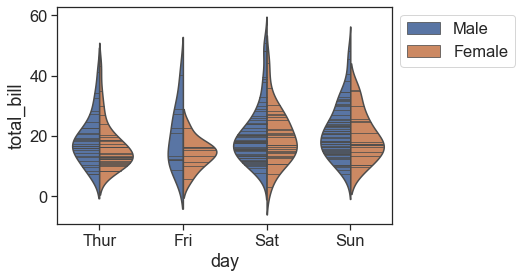

In [13]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, \
               split=True, inner="sticks")
plt.legend(bbox_to_anchor=(1.0, 1))

[top](#top)

<a name="estimation"></a>Statistical estimation within categories
---

##### Barplot

Often, rather than showing the distribution within each category, we might want to show the central tendency of the values. **barplot** accomplishes that by showing 
* an arbitrary estimate (default is the mean)
* a confidence interval around the estimate using bootstrapping when there are multiple observations in each category  

In the example below, the catgorical variables are
* the sexes ```male``` and ```female``` 
* as well as the class ```first```, ```second``` and ```third```  

The numerical data is the percentage in each category that survived the titanic, the confindence interval is shown as black errorbar. 

In [14]:
# dataset of survivors of the titanica
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


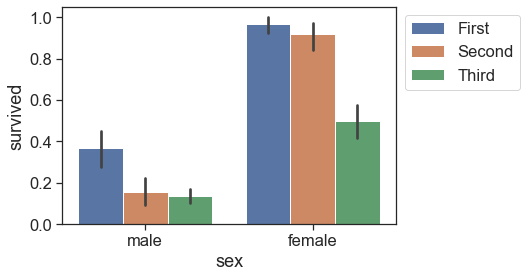

In [15]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)
plt.legend(bbox_to_anchor=(1.0, 1))

##### Countplot

Similar to a histogram we can also show the data as a **countplot** that is, in essence, a histogram over a categorical rather than a numerical variable.  
With the same titanic data we can show the number of survivors over the deck:

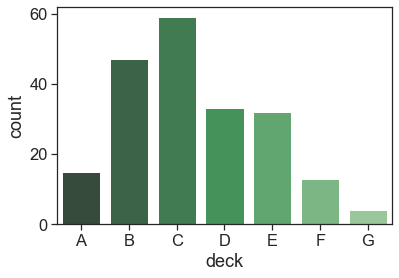

In [16]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

[top](#top)